Make and train the model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-05-20 17:27:20.255380: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load the data


In [2]:
#Train data
npz = np.load('../../data/preprocessed/data_train.npz')
train_inputs, train_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int64)

#Validation data
npz = np.load('../../data/preprocessed/data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int64)

Make the model

In [5]:
#Define the model
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 32 filter
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 64 filter
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(100, 100, 3)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 128 filter
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(150, activation='relu'), #Convolutional layer
    tf.keras.layers.Dense(5, activation='softmax'),
])

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [6]:
BATCH_SIZE = 32 
MAX_EPOCHS = 50

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
record = model.fit(
    train_inputs,
    train_targets,
    batch_size=BATCH_SIZE,
    epochs=MAX_EPOCHS,
    validation_data=(validation_inputs, validation_targets),
    steps_per_epoch=int(np.ceil(len(train_inputs)) / float(32)),
    validation_steps=int(np.ceil(len(validation_inputs)) / float(32)),
    callbacks=[early_stopping],
    verbose=2
    )

Epoch 1/50
97/97 - 27s - loss: 1.2987 - accuracy: 0.4333 - val_loss: 1.0839 - val_accuracy: 0.5478 - 27s/epoch - 282ms/step
Epoch 2/50
97/97 - 27s - loss: 1.0499 - accuracy: 0.5854 - val_loss: 0.8933 - val_accuracy: 0.6636 - 27s/epoch - 273ms/step
Epoch 3/50
97/97 - 28s - loss: 0.8872 - accuracy: 0.6537 - val_loss: 0.8269 - val_accuracy: 0.6949 - 28s/epoch - 284ms/step
Epoch 4/50
97/97 - 32s - loss: 0.7906 - accuracy: 0.6877 - val_loss: 0.7588 - val_accuracy: 0.7022 - 32s/epoch - 326ms/step
Epoch 5/50
97/97 - 29s - loss: 0.6754 - accuracy: 0.7418 - val_loss: 0.7507 - val_accuracy: 0.7353 - 29s/epoch - 301ms/step
Epoch 6/50
97/97 - 27s - loss: 0.5789 - accuracy: 0.7813 - val_loss: 0.7244 - val_accuracy: 0.7518 - 27s/epoch - 277ms/step
Epoch 7/50
97/97 - 27s - loss: 0.4829 - accuracy: 0.8179 - val_loss: 0.7657 - val_accuracy: 0.7188 - 27s/epoch - 275ms/step
Epoch 8/50
97/97 - 27s - loss: 0.3992 - accuracy: 0.8571 - val_loss: 0.7427 - val_accuracy: 0.7537 - 27s/epoch - 277ms/step
Epoch 9/

Explore the train

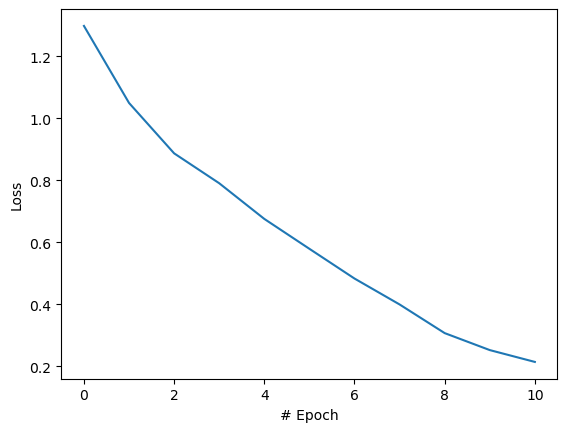

In [7]:
#Show the loss between epochs 
plt.plot(record.history['loss'])
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.show()

Save the model

In [8]:
model.save('./trained_model/flowers_cnn_model.h5')